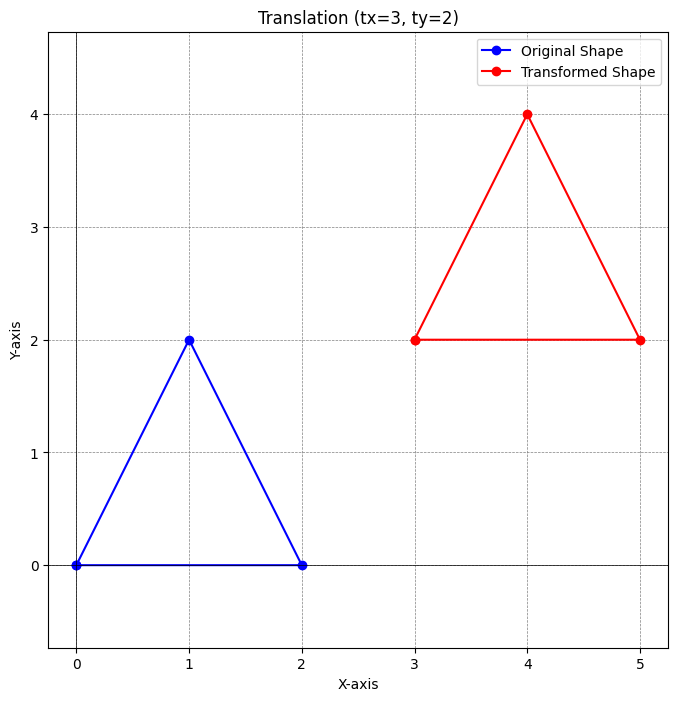

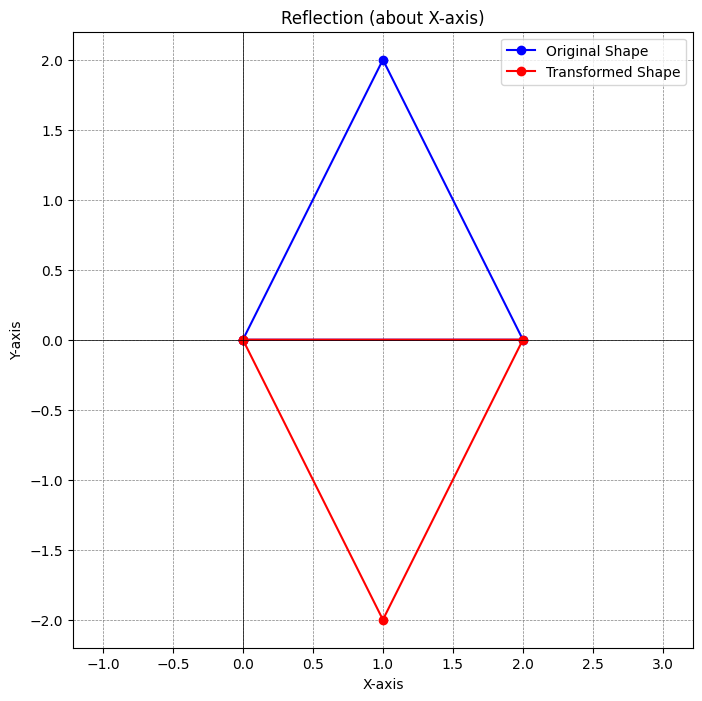

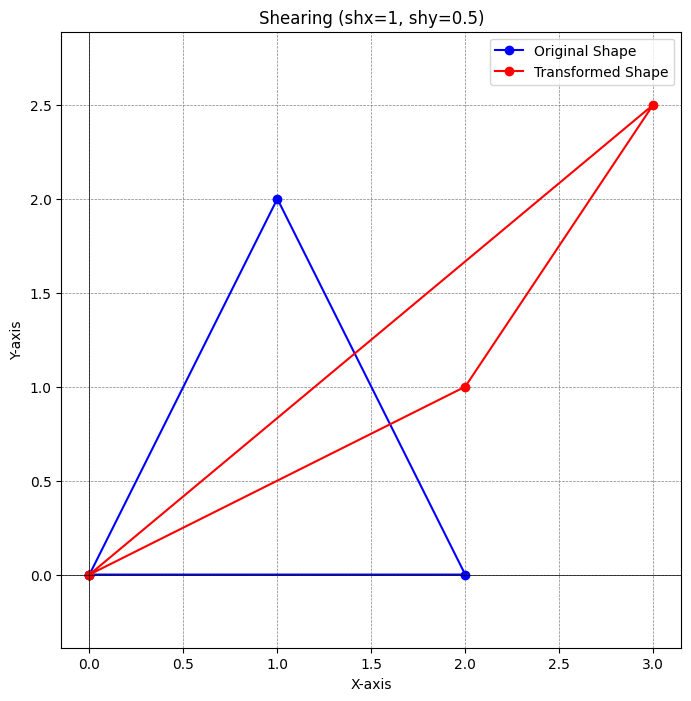

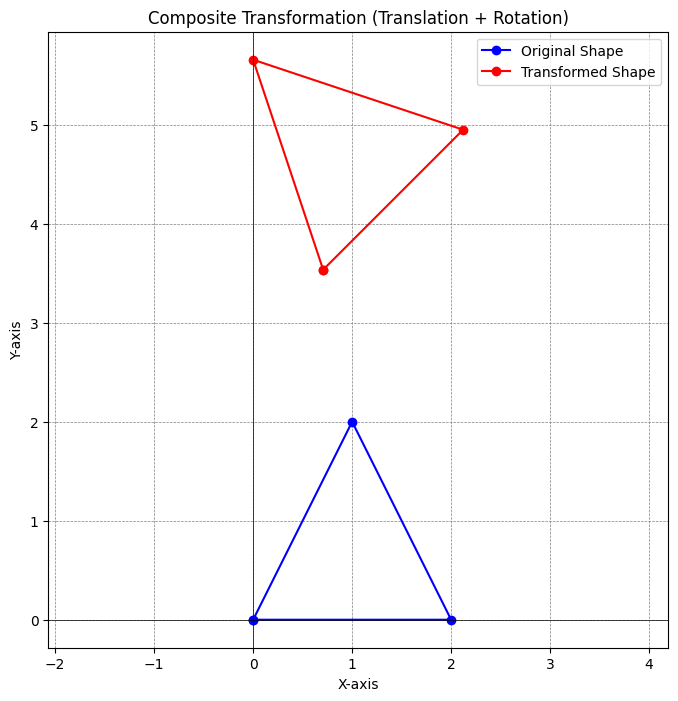

In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Function to plot the original and transformed shapes
def plot_shape(original, transformed, title):
    plt.figure(figsize=(8, 8))
    plt.plot(*original.T, 'b-o', label='Original Shape')
    plt.plot(*transformed.T, 'r-o', label='Transformed Shape')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.title(title)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.axis('equal')
    plt.show()

# Translation
def translate(shape, tx, ty):
    translation_matrix = np.array([[1, 0, tx],
                                   [0, 1, ty],
                                   [0, 0, 1]])
    homogeneous_shape = np.hstack((shape, np.ones((shape.shape[0], 1))))
    transformed_shape = (translation_matrix @ homogeneous_shape.T).T[:, :2]
    return transformed_shape

# Scaling
def scale(shape, sx, sy):
    scaling_matrix = np.array([[sx, 0, 0],
                                [0, sy, 0],
                                [0, 0, 1]])
    homogeneous_shape = np.hstack((shape, np.ones((shape.shape[0], 1))))
    transformed_shape = (scaling_matrix @ homogeneous_shape.T).T[:, :2]
    return transformed_shape

# Rotation
def rotate(shape, angle):
    radians = np.deg2rad(angle)
    rotation_matrix = np.array([[np.cos(radians), -np.sin(radians), 0],
                                 [np.sin(radians), np.cos(radians), 0],
                                 [0, 0, 1]])
    homogeneous_shape = np.hstack((shape, np.ones((shape.shape[0], 1))))
    transformed_shape = (rotation_matrix @ homogeneous_shape.T).T[:, :2]
    return transformed_shape

# Reflection
def reflect(shape, axis):
    if axis == 'x':
        reflection_matrix = np.array([[1, 0, 0],
                                       [0, -1, 0],
                                       [0, 0, 1]])
    elif axis == 'y':
        reflection_matrix = np.array([[-1, 0, 0],
                                       [0, 1, 0],
                                       [0, 0, 1]])
    elif axis == 'origin':
        reflection_matrix = np.array([[-1, 0, 0],
                                       [0, -1, 0],
                                       [0, 0, 1]])
    else:
        raise ValueError("Invalid axis! Use 'x', 'y', or 'origin'.")
    homogeneous_shape = np.hstack((shape, np.ones((shape.shape[0], 1))))
    transformed_shape = (reflection_matrix @ homogeneous_shape.T).T[:, :2]
    return transformed_shape

# Shearing
def shear(shape, shx, shy):
    shearing_matrix = np.array([[1, shx, 0],
                                 [shy, 1, 0],
                                 [0, 0, 1]])
    homogeneous_shape = np.hstack((shape, np.ones((shape.shape[0], 1))))
    transformed_shape = (shearing_matrix @ homogeneous_shape.T).T[:, :2]
    return transformed_shape

# Composite Transformation
def composite_transform(shape, transformations):
    composite_matrix = np.eye(3)
    for transformation in transformations:
        composite_matrix = transformation @ composite_matrix
    homogeneous_shape = np.hstack((shape, np.ones((shape.shape[0], 1))))
    transformed_shape = (composite_matrix @ homogeneous_shape.T).T[:, :2]
    return transformed_shape

# Define a 2D triangle
triangle = np.array([[0, 0], [2, 0], [1, 2], [0, 0]])

# 1. Translation
translated_triangle = translate(triangle, tx=3, ty=2)
plot_shape(triangle, translated_triangle, "Translation (tx=3, ty=2)")

# 2. Scaling
scaled_triangle = scale(triangle, sx=2, sy=1.5)
plot_shape(triangle, scaled_triangle, "Scaling (sx=2, sy=1.5)")

# 3. Rotation
rotated_triangle = rotate(triangle, angle=45)
plot_shape(triangle, rotated_triangle, "Rotation (45 degrees)")

# 4. Reflection
reflected_triangle = reflect(triangle, axis='x')
plot_shape(triangle, reflected_triangle, "Reflection (about X-axis)")

# 5. Shearing
sheared_triangle = shear(triangle, shx=1, shy=0.5)
plot_shape(triangle, sheared_triangle, "Shearing (shx=1, shy=0.5)")

# 6. Composite Transformation: Translation + Rotation
translation_matrix = np.array([[1, 0, 3],
                                [0, 1, 2],
                                [0, 0, 1]])
rotation_matrix = np.array([[np.cos(np.deg2rad(45)), -np.sin(np.deg2rad(45)), 0],
                             [np.sin(np.deg2rad(45)), np.cos(np.deg2rad(45)), 0],
                             [0, 0, 1]])
composite_transformed_triangle = composite_transform(triangle, [translation_matrix, rotation_matrix])
plot_shape(triangle, composite_transformed_triangle, "Composite Transformation (Translation + Rotation)")


In [ ]:
import cv2

In [ ]:

print(cv2.__version__)

4.10.0


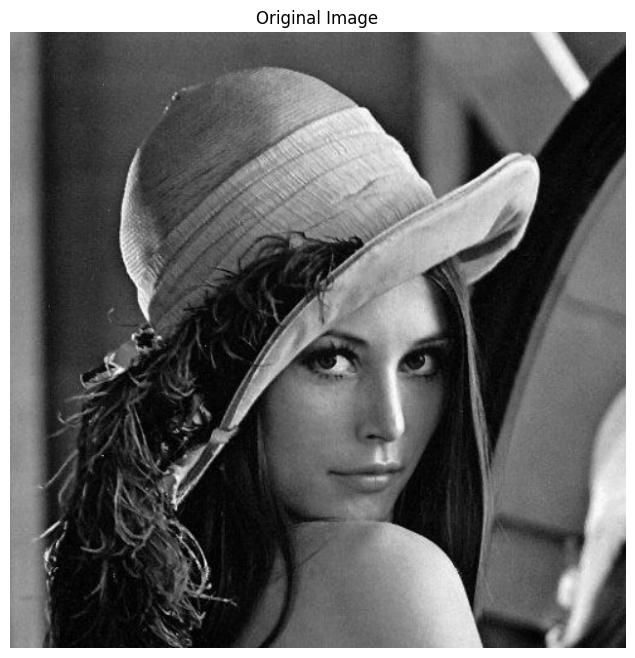

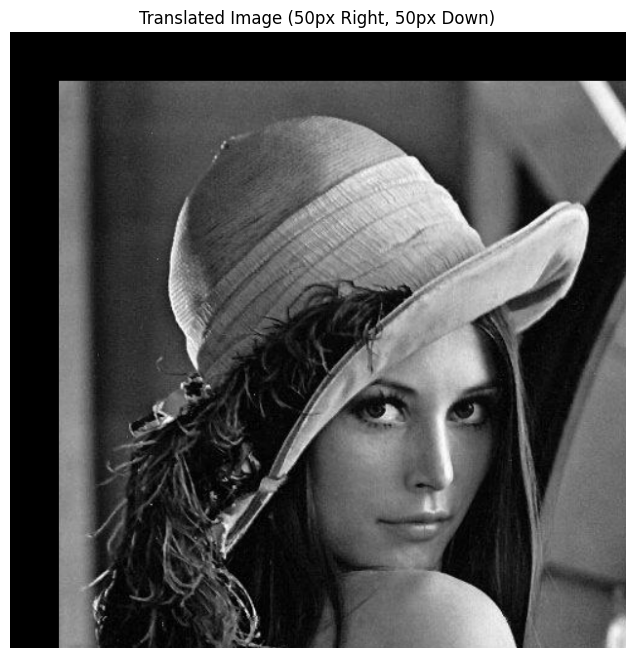

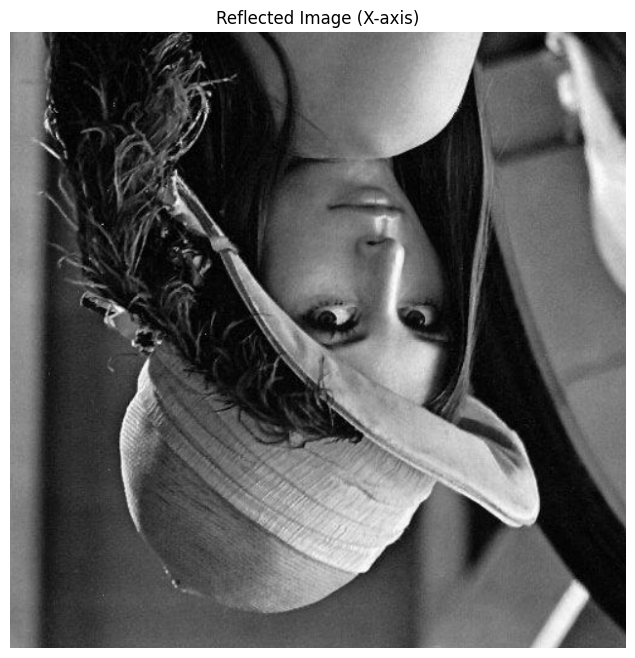

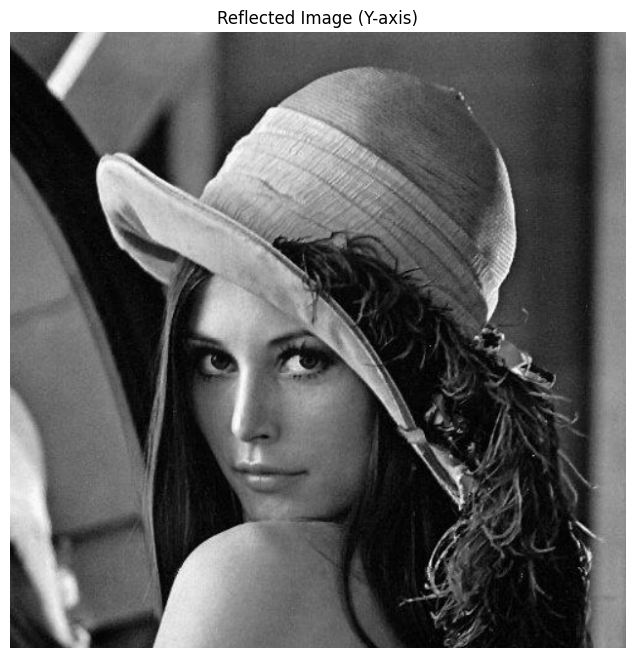

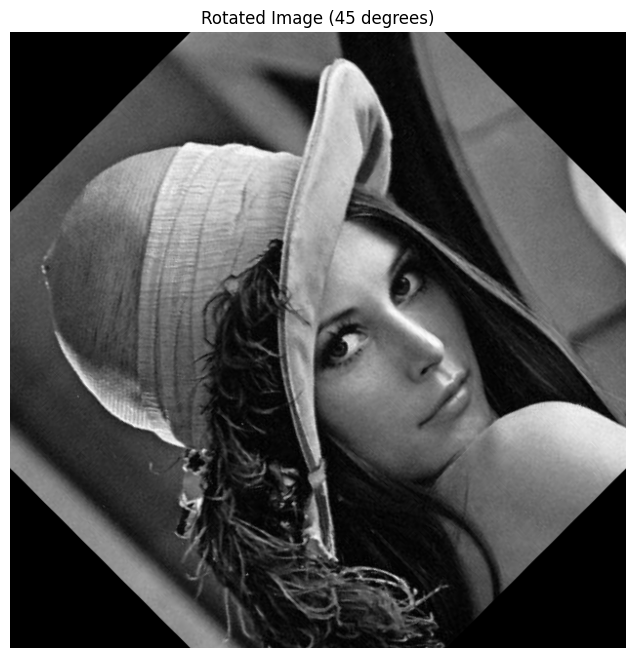

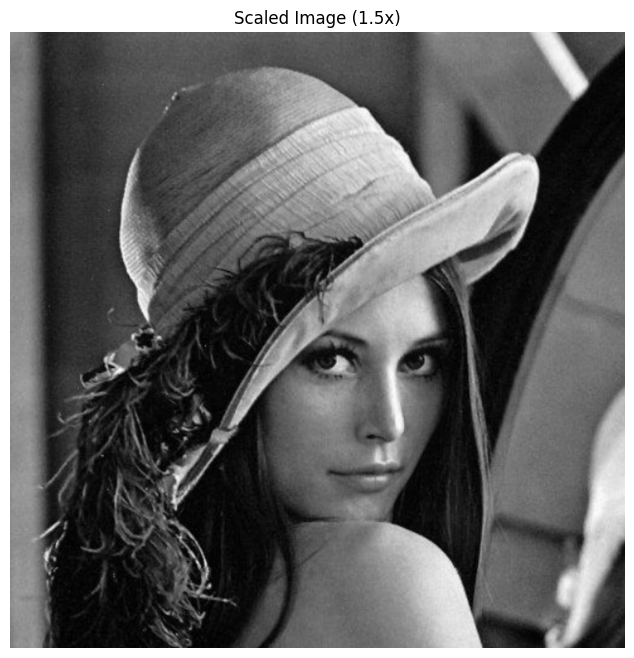

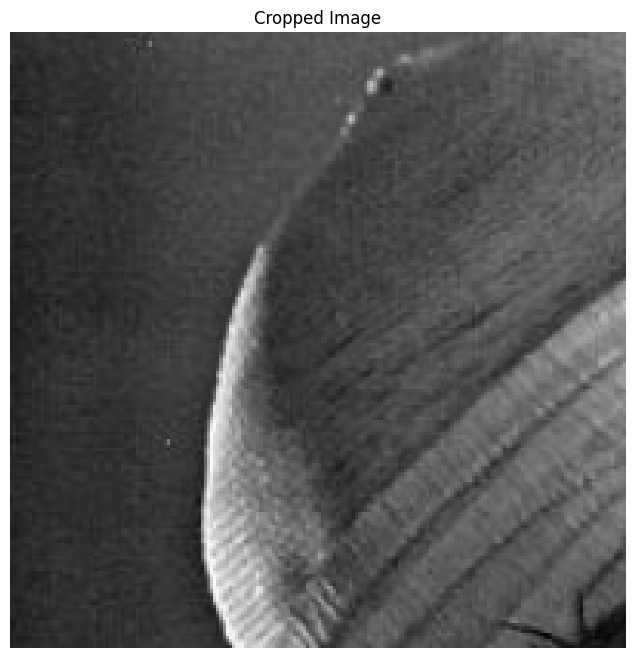

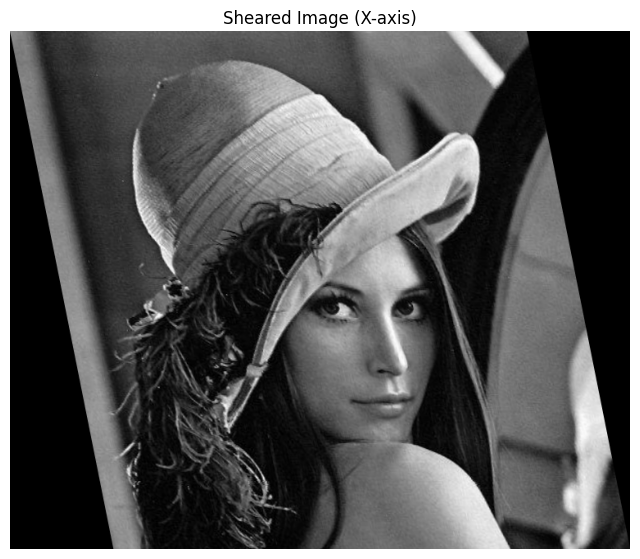

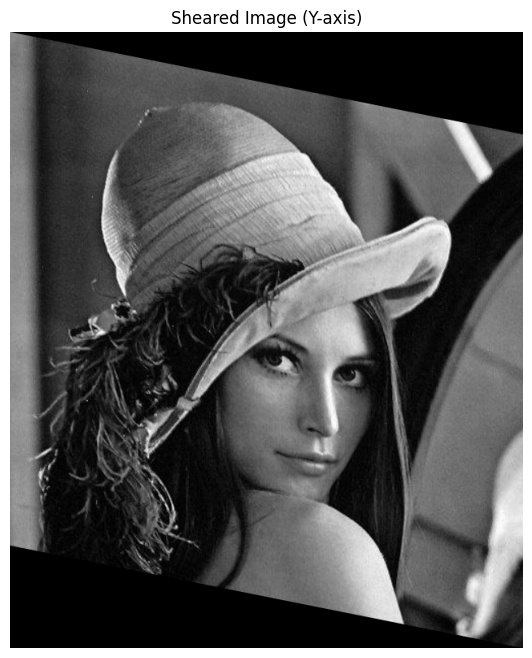

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Helper function to display images
def show_image(title, image):
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load the image
image_path = '/content/Screenshot 2025-01-21 114222.png'
image = cv2.imread(image_path)


show_image("Original Image", image)

# 1. Image Translation
def translate_image(image, tx, ty):
    rows, cols = image.shape[:2]
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_image = cv2.warpAffine(image, translation_matrix, (cols, rows))
    return translated_image

translated = translate_image(image, tx=50, ty=50)
show_image("Translated Image (50px Right, 50px Down)", translated)

# 2. Image Reflection
def reflect_image(image, axis):
    if axis == 'x':
        reflected_image = cv2.flip(image, 0)  # Reflection along x-axis
    elif axis == 'y':
        reflected_image = cv2.flip(image, 1)  # Reflection along y-axis
    elif axis == 'xy':
        reflected_image = cv2.flip(image, -1)  # Reflection along both axes
    else:
        raise ValueError("Invalid axis. Use 'x', 'y', or 'xy'.")
    return reflected_image

reflected_x = reflect_image(image, 'x')
show_image("Reflected Image (X-axis)", reflected_x)

reflected_y = reflect_image(image, 'y')
show_image("Reflected Image (Y-axis)", reflected_y)

# 3. Image Rotation
def rotate_image(image, angle):
    rows, cols = image.shape[:2]
    center = (cols / 2, rows / 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
    return rotated_image

rotated = rotate_image(image, angle=45)
show_image("Rotated Image (45 degrees)", rotated)

# 4. Image Scaling
def scale_image(image, fx, fy):
    scaled_image = cv2.resize(image, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)
    return scaled_image

scaled = scale_image(image, fx=1.5, fy=1.5)
show_image("Scaled Image (1.5x)", scaled)

# 5. Image Cropping
def crop_image(image, x_start, y_start, width, height):
    cropped_image = image[y_start:y_start + height, x_start:x_start + width]
    return cropped_image

cropped = crop_image(image, x_start=50, y_start=50, width=200, height=200)
show_image("Cropped Image", cropped)

# 6. Shearing in x-axis
def shear_x(image, shear_factor):
    rows, cols = image.shape[:2]
    shear_matrix = np.float32([[1, shear_factor, 0], [0, 1, 0]])
    sheared_image = cv2.warpAffine(image, shear_matrix, (cols + int(shear_factor * rows), rows))
    return sheared_image

sheared_x = shear_x(image, shear_factor=0.2)
show_image("Sheared Image (X-axis)", sheared_x)

# 7. Shearing in y-axis
def shear_y(image, shear_factor):
    rows, cols = image.shape[:2]
    shear_matrix = np.float32([[1, 0, 0], [shear_factor, 1, 0]])
    sheared_image = cv2.warpAffine(image, shear_matrix, (cols, rows + int(shear_factor * cols)))
    return sheared_image

sheared_y = shear_y(image, shear_factor=0.2)
show_image("Sheared Image (Y-axis)", sheared_y)
